In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
!sudo apt-get install -y fonts-nanum > /dev/null 
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

In [1]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [4]:
!pip install konlpy > /dev/null

In [5]:
import nltk
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

In [6]:
path ='/content/drive/MyDrive/project/data/'

In [7]:
os.chdir(path)

In [8]:
df = pd.read_csv('hankyung_news_stock.csv')
df

,index,Close,Open,High,Low,Volume,Change,title,en_list
0,2018-10-22,2161.71,2143.08,2163.21,2136.92,308740000.0,0.0025,방산 방심은 금물 방산 방심은 금물정유 화학업종 IMO 2020 카슈끄지 그리...,Blood-defense vigilant is a gold refinery indu...
1,2018-10-23,2106.10,2147.30,2148.80,2094.69,373470000.0,-0.0257,자동차 Daily Auto Check 자동차 Daily Auto Check유통 D...,Automotive Daily Auto CHECK DAILY AUTO CHECK D...
2,2018-10-24,2097.58,2119.19,2121.36,2092.10,399730000.0,-0.0040,유통 Daily 코멘트 및 뉴스 업데이트 Daily 코멘트 및 뉴스 업데이트디스플...,Distribution Daily Comments and News Updates D...
3,2018-10-25,2063.30,2046.67,2066.06,2033.81,376010000.0,-0.0163,건설업종 투자의 시대 투자의 시대자동차 흑자전환에 성공한 Tesla 흑자전환에 ...,Tesla Semiconductor IT Softer Market Ahead Sem...
4,2018-10-26,2027.15,2066.57,2066.57,2008.86,449200000.0,-0.0175,유통 Amazon 3Q18 Review 희비 공존 Amazon 3Q18 Revi...,Distribution Amazon 3q18 Review Right Coexist ...
...,...,...,...,...,...,...,...,...,...
732,2021-10-15,3015.06,3012.62,3021.90,2999.33,857800000.0,0.0088,오락 디즈니플러스 쇼케이스 요약 쇼케이스 내내 콘텐츠 강조화학 신사업 ...,Entertainment Disney Plus Showcase Summary Cor...
733,2021-10-18,3006.68,3017.48,3021.17,2990.44,926370000.0,-0.0028,제약 제약 바이오 Weekly 제약 바이오 주간 코멘트국내 주요 뉴스 및 공시...,Pharmaceutical Bio Weekly Major News & Public ...
734,2021-10-19,3029.04,3022.23,3034.53,3014.19,845700000.0,0.0074,방송 비디어 중국 규제 피해는 정말 없는 것 같습니다 중국 규제 피해는 정말 없는...,Broadcasting Videos China Regulatory Damage se...
735,2021-10-20,3013.13,3043.13,3047.24,3012.97,668300.0,-0.0053,조선 meritz 조선 기계 Daily 국내외 주요 뉴스 및 코멘트자동차 ...,Joseon Meritz Joseon Machinery Daily Daily Maj...


In [9]:
from konlpy.tag import *
okt = Okt() 

In [10]:
for i in range(len(df)):
    df.title[i] = ' '.join(okt.nouns(df.title[i]))

In [11]:
df.head()

,index,Close,Open,High,Low,Volume,Change,title,en_list
0,2018-10-22,2161.71,2143.08,2163.21,2136.92,308740000.0,0.0025,방산 방심 금물 방산 방심 금물 정유 화학 업종 카슈끄 유가 카슈끄 유가 자동차 자...,Blood-defense vigilant is a gold refinery indu...
1,2018-10-23,2106.10,2147.30,2148.80,2094.69,373470000.0,-0.0257,자동차 자동차 유통 코멘트 및 뉴스 업데이트 코멘트 및 뉴스 업데이트 화학 정제 마...,Automotive Daily Auto CHECK DAILY AUTO CHECK D...
2,2018-10-24,2097.58,2119.19,2121.36,2092.10,399730000.0,-0.0040,유통 코멘트 및 뉴스 업데이트 코멘트 및 뉴스 업데이트 디스플레이 중 패권 경쟁 중...,Distribution Daily Comments and News Updates D...
3,2018-10-25,2063.30,2046.67,2066.06,2033.81,376010000.0,-0.0163,건설 업종 투자 시대 투자 시대 자동차 흑자 전환 흑자 전환 반도체 반도체 엔터 사...,Tesla Semiconductor IT Softer Market Ahead Sem...
4,2018-10-26,2027.15,2066.57,2066.57,2008.86,449200000.0,-0.0175,유통 희비 공존 희비 공존 테슬라 발 빅뱅 본격 테슬라 발 빅뱅 본격 조선 조선 기...,Distribution Amazon 3q18 Review Right Coexist ...


## 불용어 제거

In [12]:
path='/content/drive/MyDrive/project/기타참고자료'
stopwords = pd.read_csv(f'{path}/한국어불용어100.txt', sep='\s+', header=None)

In [13]:
stopwords = set(stopwords[0])
len(stopwords)

94

In [14]:
title_str = []

for i in range(len(df['title'])):
    noun_list = okt.nouns(df['title'][i])
    temp_str = ' '.join(word for word in noun_list if word not in stopwords)
    title_str.append(temp_str)

In [15]:
df['title_cln'] = title_str
df.head()

,index,Close,Open,High,Low,Volume,Change,title,en_list,title_cln
0,2018-10-22,2161.71,2143.08,2163.21,2136.92,308740000.0,0.0025,방산 방심 금물 방산 방심 금물 정유 화학 업종 카슈끄 유가 카슈끄 유가 자동차 자...,Blood-defense vigilant is a gold refinery indu...,방산 방심 금물 방산 방심 금물 정유 화학 업종 카슈끄 유가 카슈끄 유가 자동차 자...
1,2018-10-23,2106.10,2147.30,2148.80,2094.69,373470000.0,-0.0257,자동차 자동차 유통 코멘트 및 뉴스 업데이트 코멘트 및 뉴스 업데이트 화학 정제 마...,Automotive Daily Auto CHECK DAILY AUTO CHECK D...,자동차 자동차 유통 코멘트 및 뉴스 업데이트 코멘트 및 뉴스 업데이트 화학 정제 마...
2,2018-10-24,2097.58,2119.19,2121.36,2092.10,399730000.0,-0.0040,유통 코멘트 및 뉴스 업데이트 코멘트 및 뉴스 업데이트 디스플레이 중 패권 경쟁 중...,Distribution Daily Comments and News Updates D...,유통 코멘트 및 뉴스 업데이트 코멘트 및 뉴스 업데이트 디스플레이 패권 경쟁 중국 ...
3,2018-10-25,2063.30,2046.67,2066.06,2033.81,376010000.0,-0.0163,건설 업종 투자 시대 투자 시대 자동차 흑자 전환 흑자 전환 반도체 반도체 엔터 사...,Tesla Semiconductor IT Softer Market Ahead Sem...,건설 업종 투자 시대 투자 시대 자동차 흑자 전환 흑자 전환 반도체 반도체 엔터 사...
4,2018-10-26,2027.15,2066.57,2066.57,2008.86,449200000.0,-0.0175,유통 희비 공존 희비 공존 테슬라 발 빅뱅 본격 테슬라 발 빅뱅 본격 조선 조선 기...,Distribution Amazon 3q18 Review Right Coexist ...,유통 희비 공존 희비 공존 테슬라 발 빅뱅 본격 테슬라 발 빅뱅 본격 조선 조선 기...


In [16]:
fre_word = [t for tr in df for t in df.title_cln] 

In [17]:
s_fre_word = str(fre_word)

In [18]:
s_fre_list = s_fre_word.split()

In [19]:
len(s_fre_list)

2041850

In [20]:
np.unique(s_fre_list)

array(["'건설", "'게임", "'교통", ..., '힘', '힘겨루기', '힙할'], dtype='<U9')

In [21]:
len(np.unique(s_fre_list))

7907

In [22]:
txt = nltk.Text(s_fre_list, name='word') # 빈도수 계산
print(txt)

<Text: word>


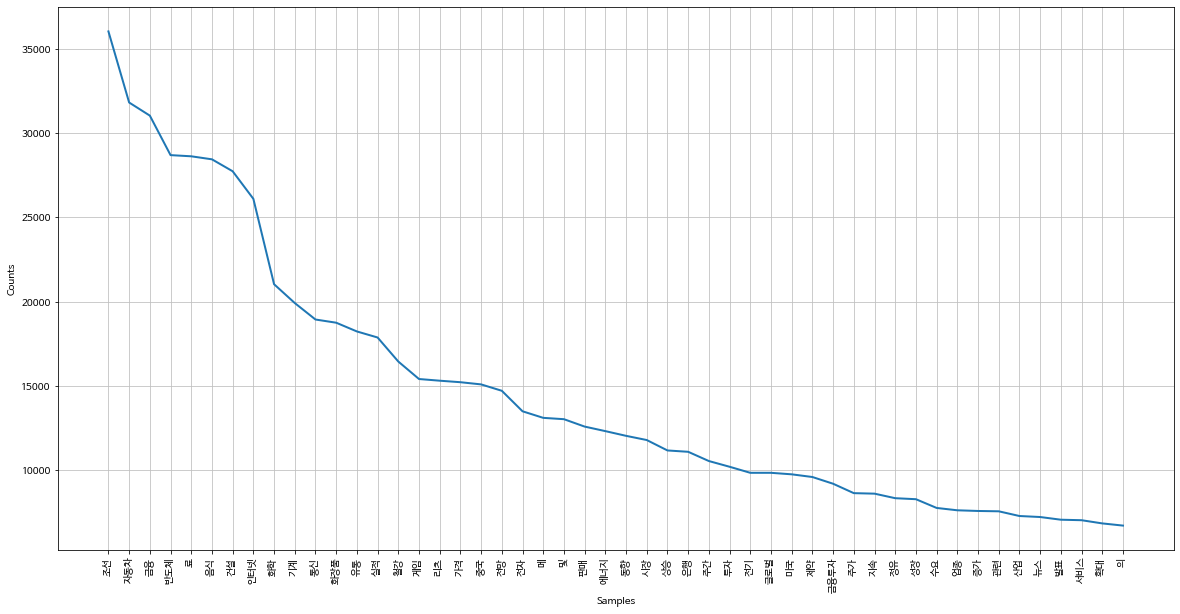

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
txt.plot(50)

In [24]:
from wordcloud import WordCloud
data = txt.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

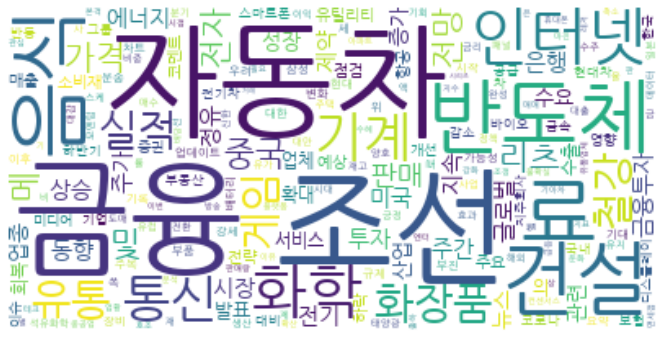

In [25]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
sel_token=[f[0] for f in txt.vocab().most_common(500)]
print(sel_token[:10])

['조선', '자동차', '금융', '반도체', '료', '음식', '건설', '인터넷', '화학', '기계']


In [27]:
def frev(doc):
    return [doc.count(stoken) for stoken in sel_token]

## 데이터 분리

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.title_cln, df.Change, test_size=0.1, random_state=0)

In [41]:
y_test.to_csv('test_y2.csv')

In [30]:
train_x = [frev(d) for d in X_train] 
train_y = [d for d in y_train]

test_x = [frev(d) for d in X_test]
test_y = [d for d in y_test]

In [31]:
train_x=np.asarray(train_x).astype('float32')
train_y=np.asarray(train_y).astype('float32')
test_x=np.asarray(test_x).astype('float32')
test_y=np.asarray(test_y).astype('float32')

In [32]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((663, 500), (663,), (74, 500), (74,))

## 모델 학습

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [43]:
np.random.seed(0)
model=models.Sequential()

model.add(layers.Dense(256, activation='relu',input_shape=(500,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss=Huber(), optimizer=Adam(0.0005), metrics=['mse'])

earlystopping = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

hist = model.fit(train_x,train_y,epochs=300,batch_size=200, 
                 validation_data=(test_x, test_y), verbose = 2, 
                 callbacks=[checkpoint, earlystopping])

Epoch 1/300
4/4 - 2s - loss: 0.1127 - mse: 0.2311 - val_loss: 0.0162 - val_mse: 0.0324

Epoch 00001: val_loss improved from inf to 0.01619, saving model to tmp/ckeckpointer.ckpt
Epoch 2/300
4/4 - 0s - loss: 0.0129 - mse: 0.0257 - val_loss: 0.0171 - val_mse: 0.0342

Epoch 00002: val_loss did not improve from 0.01619
Epoch 3/300
4/4 - 0s - loss: 0.0093 - mse: 0.0187 - val_loss: 0.0165 - val_mse: 0.0331

Epoch 00003: val_loss did not improve from 0.01619
Epoch 4/300
4/4 - 0s - loss: 0.0103 - mse: 0.0206 - val_loss: 0.0053 - val_mse: 0.0106

Epoch 00004: val_loss improved from 0.01619 to 0.00532, saving model to tmp/ckeckpointer.ckpt
Epoch 5/300
4/4 - 0s - loss: 0.0042 - mse: 0.0084 - val_loss: 0.0057 - val_mse: 0.0115

Epoch 00005: val_loss did not improve from 0.00532
Epoch 6/300
4/4 - 0s - loss: 0.0038 - mse: 0.0077 - val_loss: 0.0035 - val_mse: 0.0070

Epoch 00006: val_loss improved from 0.00532 to 0.00352, saving model to tmp/ckeckpointer.ckpt
Epoch 7/300
4/4 - 0s - loss: 0.0034 - mse

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               128256    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [45]:
pred = model.predict(test_x)

In [42]:
pred_df = pd.DataFrame(pred)
pred_df.to_csv('pred2.csv')

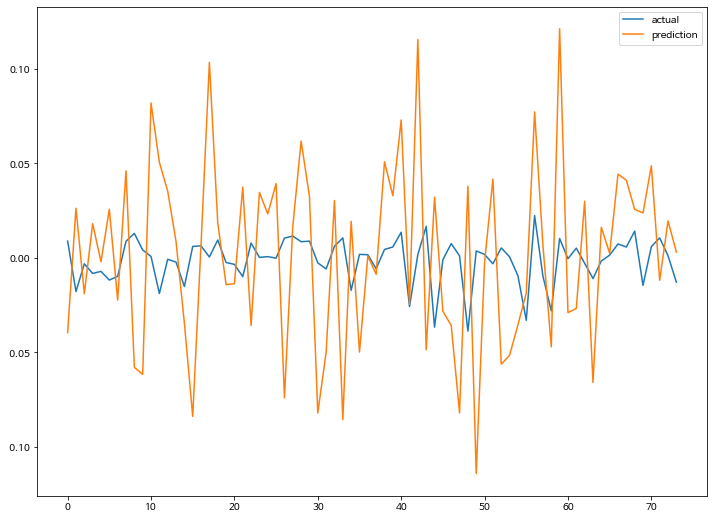

In [46]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test), label='actual')
plt.plot(pred, label='prediction')
plt.legend() 
plt.show() 

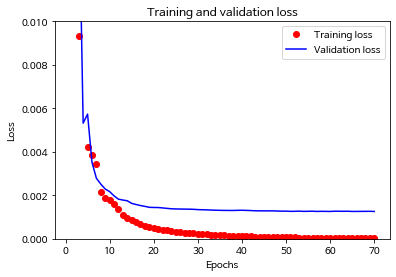

In [47]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0,0.01))
plt.legend() 

plt.show()

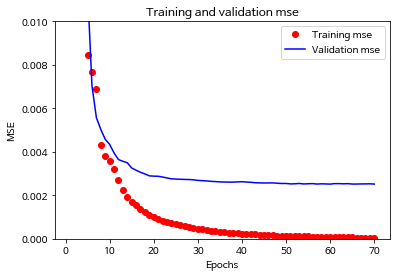

In [48]:
mse = hist.history['mse']
val_mse = hist.history['val_mse']

epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, 'ro', label='Training mse')

plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('MSE') 
plt.ylim((0,0.01))
plt.legend()

plt.show() 